# Crear un dashboad estático para una empresa logística

Se quiere construir un *dashboard* usando algunos de los archivos de unos datos adjuntos.

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [12]:
#
# Carga de datos
#
def cargar_datos():
    df = pd.read_csv('../files/input/shipping-data.csv')
    return df

In [13]:
#
# Carpeta donde se guardarán resultados
#
def crear_carpeta():
    os.makedirs('../docs', exist_ok=True)

In [14]:
crear_carpeta()

In [15]:
# Visual para los envíos por bodega

def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    
    counts.plot.bar(
        title='Shipping per Warehouse',
        xlabel='Wirehouse block',
        ylabel='Record Count',
        color='tab:blue',
        fontsize=8,
    )

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.savefig(
        '../docs/shipping_per_warehouse.png'
    )

    plt.show()

In [16]:
#
# Visual for Mode of Shipment
#

def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title='Mode of Shipment',
        wedgeprops=dict(width=0.35),
        ylabel='',
        colors=[
            'tab:blue',
            'tab:orange',
            'tab:green',
        ]
    )

    plt.savefig(
        '../docs/mode_of_shipment.png'
    )

In [17]:
#
# Visual for Average Customer Rating
#

def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[['Mode_of_Shipment', 'Customer_rating']]
        .groupby("Mode_of_Shipment")
        .describe()
    )

    df.columns = df.columns.droplevel()

    df = df[['mean', 'min', 'max',]]

    plt.barh(
        y=df.index.values,
        width=df['max'].values - 1,
        left=df['min'].values,
        height=0.9,
        color='lightgray',
        alpha=0.8,
    )

    colors = [
        'tab:green' if value >= 3.0 else 'tab:orange' for value in df['mean'].values
    ]

    plt.barh(
        y=df.index.values,
        width=df['mean'].values - 1,
        left=df['min'].values,
        color=colors,
        height=0.5,
        alpha=1.0,
    )

    plt.title('Average Customer Rating')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['bottom'].set_color('gray')

    plt.savefig(
        '../docs/average_customer_rating.png'
    )

In [18]:
#
# Visual for Weight Distribution

def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title='Shipped Weight Distribution',
        color='tab:orange',
        edgecolor='white',
    )

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.savefig(
        '../docs/weight_distribution.png'
    )

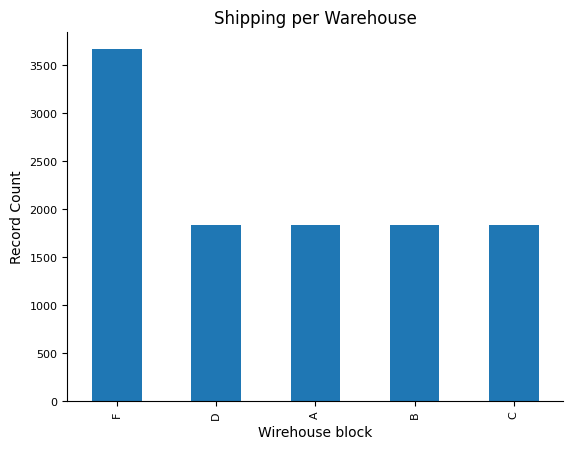

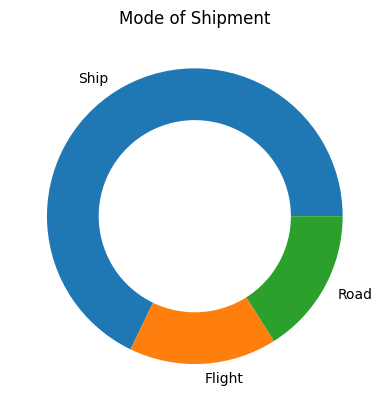

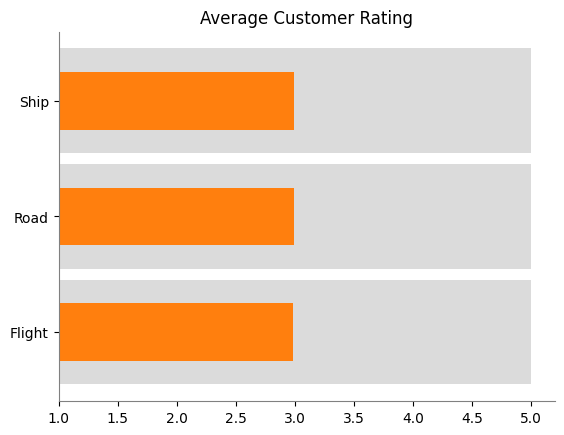

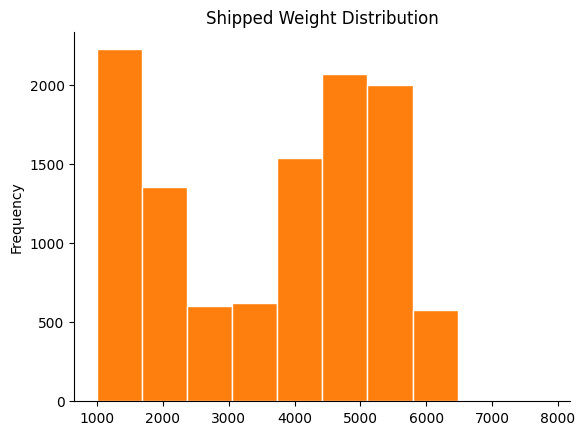

In [19]:
df = cargar_datos()

create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_rating(df)
create_visual_for_weight_distribution(df)

In [21]:
%%writefile ../docs/index.html

<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div Style="'width:45%;float:left">
            <img src="shipping_per_warehouse.png" alt="Fig 1">
            <img src="mode_of_shipment.png" alt="Fig 2">
        </div>
        <div Style="'width:45%;float:left">
            <img src="average_customer_rating.png" alt="Fig 3">
            <img src="weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>

Writing ../docs/index.html
